<a href="https://colab.research.google.com/github/kiranbkulkarni/Data_Explorer/blob/master/19200530_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP47670 Assignment 2: Text Classification

Presented By: Kiran Kulkarni(19200530)

### Overview:  
The objective of this assignment is to scrape consumer reviews from a set of web pages and evaluate the performance of text classification on the data. The reviews have been divided into five categories here:
    * http://mlg.ucd.ie/modules/yalp *
Each review has a star rating. For this assignment, we will assume that 1-star to 3-star reviews are “negative”, and 4-star to 5-star reviews as “positive”.


The following tasks were completed as part of the assignment

* Task 1: To select three categories from the above mentioned base URL. To scrape all the reviews for each cartegory ans store them as three seperate datasets. To segregate the reviews based on the ratings and to provide a class label.(i.e., Positive or Negative)

* Task 2: For the three category datasets: 
    * a.	From the reviews in this category, apply appropriate preprocessing steps to create a numeric representation of the data, suitable for classification.
    * b.	Build a classification model using a classifier of your choice, to distinguish between “positive” and “negative” reviews.
    * c.	Test the predictions of the classification model using an appropriate evaluation strategy. Report and discuss the evaluation results in your notebook.

* Task 3.	Evaluate the performance of each of your three classification models when applied to data from the other two selected categories. That is, for each unique pair of selected categories (A,B), run the experiments:
    * a.	Train a classification model on the data from “Category A”, and evaluate its performance on the data from “Category B”.
    * b.	Train a classification model on the data from “Category B”, and evaluate its performance on the data from “Category A”.
    
    
#### GUIDELINES: 
For the assignment, only these third-party packages were used: NumPy, Pandas, Scikit-learn, NLTK, SciPy, Requests, BeautifulSoup, Matplotlib, Seaborn, Gensim


### TASK 1: Scraping for reviews

Before we begin the task 1, few necessary python packages should be installed on the machine. Some machines does have them installed and some don't.

In [0]:
#Installing the necessary packages

!pip install beautifulsoup4
!pip install lxml
!pip install requests
!pip install gensim
!pip install seaborn
!pip install nltk

Once the necessary packges are installed, we should import them to our project.

In [0]:
#import nltk - natural language toolkit
import nltk

#import the beautifulsoup 4 package for scraping the websites for reviews.
import bs4 as bs

#import the request package for hanfling http requests.
import urllib.request

#import pandas to hangle the panel data and store the scraped data into dataframes.
import pandas as pd

#import numpy as np. To handle numerical data.
import numpy as np

#import regular expression
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from sklearn.linear_model import LogisticRegression

#accuracy using accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from nltk import word_tokenize

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from nltk.stem import PorterStemmer, WordNetLemmatizer

from nltk import word_tokenize

After installing NLTK package, a few sub modules needs to be downloaded. Using the following lines of code, 'punkt', 'stopwords' are downloadedm

In [0]:
#download the stopwords subpackage of nltk

#please uncomment the following statements to install the packages.
nltk.download ('stopwords')

#download the punkt subpackage of nltk

nltk.download ('punkt')

#download all packages in nltk

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

To begin with, I have chosen Automotive, Cafe, and Fashion as my three choices of category. This choice is arbitrary. Choosing the categories which are more similar in nature(i.e., cafes and restaurants) could add bias to our Machine Learning model. So, keeping this in mind I have taken categories that are not closely related. 

### Scrape for data

In order tp scrape the data from the url, I have written a function to each category which takes a url as input and returns a data frame containing the requested data. This function is more specific the kind of data  we are trying to scrape. It cannot be generalised.

In [0]:

# A function to scrape data from the base url
def scrape_data(url): # url of each category
    df_category = pd.DataFrame() #initialise an empty dataframe to hold the data
    review_rating = [] # a list to hold the review text for each review
    review_text = [] # a list to hold review rating for each review

    sauce_category = urllib.request.urlopen(url).read() # passing the category url to create a sauce object
    soup_category = bs.BeautifulSoup(sauce_category, 'lxml') # passing the sauce object to create a soup object
    for item_url in soup_category.find_all('a'): # for loop to iterate overate each url for each shop.
        print(item_url.get('href'))
        if item_url.get('href') == "index.html": # an if condition to skip the index.html
            continue # to skip and continue to next item
        sauce_n = urllib.request.urlopen('http://mlg.ucd.ie/modules/yalp/'+item_url.get('href')).read() #passing the item_url to create a item_sauce object
        soup_n = bs.BeautifulSoup(sauce_n, 'html.parser') #passing the item_suace object to create a item_soup object
        for review_containers in soup_n.find_all("div", {"class": "review"}): # for lopp to iterate over each review
            review_rating.append(review_containers.find_all("p", {"class": "rating"})[0].find_all('img')[0]["alt"]) #extracting review rating and appending it to the review_rating list
            review_text.append(review_containers.find_all("p", {"class": "review-text"})[0].text) # extracting the review_text and appending it to the review_text list
        
    df_category['review_rating'] = review_rating #assigning the review rating to data frame
    df_category['review_text'] = review_text #assigning the review text to data frame 
    
    return df_category # return the data in the form of a dataframe.

In [12]:
url = 'http://mlg.ucd.ie/modules/yalp/cafes_list.html'
sauce_category = urllib.request.urlopen(url).read() # passing the category url to create a sauce object
soup_category = bs.BeautifulSoup(sauce_category, 'lxml') # passing the sauce object to create a soup object
for item_url in soup_category.find_all('a'): # for loop to iterate overate each url for each shop.
    print(item_url.get('href'))

index.html
review_set_semizMsHqDfT_kOXQITSOA.html
review_set_WWTQUb_NUAd5Q_k7jq2r0A.html
review_set_6Or07nY9iiSSJf-Kaf0GMw.html
review_set_4l5SRJkmjrRkYVxWNVwFsg.html
review_set_TpwCjlKsdYjLsvlYhKGt4g.html
review_set_fRDNQyptBl3c-AggfwfMCg.html
review_set_kownTVHHvOKawjjmO_WkJw.html
review_set_2nqMgNGA0ejmpYFuH77xAA.html
review_set_bXCWON2Me0o86qvAb-XZPQ.html
review_set_kBIF4PFTbaf7s8sx8buREg.html
review_set_bR23zlcVESo_vnBlCLBpwQ.html
review_set_vt2NMSbKpVN0r0HI6Az4bw.html
review_set_rIRzDHgiPPivvjfySMeGtA.html
review_set_RfniramWeD6QY-2WsKAhvg.html
review_set_AXZ8RTf83-bnNJjdeMSqng.html
review_set_eH96MBK-EAcC0Q-lYqIb8Q.html
review_set_IhNASEZ3XnBHmuuVnWdIwA.html
review_set_KMNkriayvWEwdZPcmr1faA.html
review_set_Hza9Lq1vqA4yTElotZVTDA.html
review_set_LTtXEZOUVcbd4sZ3dQwg9A.html
review_set_-OhQws_Si3YOYDfm6DilxA.html
review_set_YcXp3IMt3qgmCH5-oyXuOg.html
review_set_eaIVcOTMOeb8U2inN3UTzg.html
review_set_1ziYClLmdE0CdHqlt9H1dw.html
review_set_YSPwC1polC7TOwP1kkxkjg.html
review_set_vSH

In [0]:
cafe_url = 'http://mlg.ucd.ie/modules/yalp/cafes_list.html' # a variable to hold the cafe url
auto_url = 'http://mlg.ucd.ie/modules/yalp/automotive_list.html' # a variable to hold automotive url
fash_url = 'http://mlg.ucd.ie/modules/yalp/fashion_list.html' # a variable to hold fashion url

df_cafe = scrape_data(cafe_url) # a dataframe to hold the cafe data
df_auto = scrape_data(auto_url) # a dataframe to hold the automotive data
df_fash = scrape_data(fash_url) # a dataframe to hold the fashion data

Storing the data into a csv.

In [0]:
df_cafe.to_csv('cafe_reviews.csv') # saving data frame into a csv file
df_auto.to_csv('automotive_reviews.csv')
df_fash.to_csv('fashion_reviews.csv')

### Text pre-processing and assigning the traget label

# New Section

Before beginning the text pre-processing, let's first clean the collected data

In [0]:
df_cafe['review_rating'] = df_cafe['review_rating'].str.split('-', expand=True)[0].astype(int) # split function applied to extract the rating(numeric part) from rating text 
df_auto['review_rating'] = df_auto['review_rating'].str.split('-', expand=True)[0].astype(int)
df_fash['review_rating'] = df_fash['review_rating'].str.split('-', expand=True)[0].astype(int)

In [0]:
print(df_cafe.head()) # to confirm the changes in previous step have been applied

print(type(df_cafe.review_rating[0]))

   review_rating                                        review_text
0              4  Pros: Lots of items you would not expect from ...
1              4  Best egg-tarts in town! There's really not muc...
2              2  I've been to ABC Bakery a few times since I re...
3              1  FYI, Closed Monday's New ownership for about 1...
4              4  The inside may not look like much but they mak...
<class 'numpy.int64'>


#### To classify the reviews based on the rating. If the rating is below 3-star it's considered as Negative else it's Positive.

In [0]:

# a funtion to classify the review text based on the rating
def classify_review(df):
    df['class_label'] = np.where(df['review_rating']>=4, 'Positive', 'Negative') # if the rating is equal to or greater than 4, it's classified as Postive else Negative
    return df


In [0]:
classify_review(df_cafe) #applying classify_review() on each category
classify_review(df_auto)
classify_review(df_fash)

,review_rating,review_text,class_label
0,5,Looking for the best tactical supplies? Look n...,Positive
1,1,Stood in line like an idiot for 5 minutes to p...,Negative
2,4,Another great store with quality Equipment. Th...,Positive
3,5,The Problem with this store is not that they h...,Positive
4,5,Great place! We went in at almost closing time...,Positive
...,...,...,...
1995,4,"God, I'd never thought I'd see the day when I'...",Positive
1996,1,They keep shooting themselves in the foot. Apo...,Negative
1997,1,"Extremely dark., so dark you can't see the out...",Negative
1998,1,"This place is dark, loud, and filled with enou...",Negative


In [0]:
df_cafe.sample() #checking the sample

,review_rating,review_text,class_label
555,5,I think I would set up camp in their store if ...,Positive


### TASK 2: Ananlysis and Pre-Processing

#### Some analysis on the reviews

In [0]:
def count_reviews(df):
    # Find the number of positive and negative reviews
    print('Number of positive and negative reviews: ', df.class_label.value_counts())
    # Find the proportion of positive and negative reviews
    print('Proportion of positive and negative reviews: ', df.class_label.value_counts() / len(df))

In [0]:
# Number of positive and negative reviews in cafe category
count_reviews(df_cafe)

Number of positive and negative reviews:  Positive    1462
Negative     538
Name: class_label, dtype: int64
Proportion of positive and negative reviews:  Positive    0.731
Negative    0.269
Name: class_label, dtype: float64


In [0]:
# Number of positive and negative reviews in automotive category
count_reviews(df_auto)

Number of positive and negative reviews:  Positive    1212
Negative     788
Name: class_label, dtype: int64
Proportion of positive and negative reviews:  Positive    0.606
Negative    0.394
Name: class_label, dtype: float64


In [0]:
# Number of positive and negative reviews in fashion category
count_reviews(df_fash)

Number of positive and negative reviews:  Positive    1205
Negative     795
Name: class_label, dtype: int64
Proportion of positive and negative reviews:  Positive    0.6025
Negative    0.3975
Name: class_label, dtype: float64


##### A function to find the max and min length of reviews

In [0]:
def review_length(df):
    length_reviews = df.review_text.str.len()
    # How long is the longest review
    print("\n Review with Maximum lenght: ", max(length_reviews))
    # How long is the shortest review
    print("\n Review with Minimum lenght: ", min(length_reviews))

In [0]:
print("Length of reviews in Cafe Category:")
review_length(df_cafe)

Length of reviews in Cafe Category:

 Review with Maximum lenght:  4865

 Review with Minimum lenght:  117


In [0]:
print("Length of reviews in Automobile Category:")
review_length(df_auto)

Length of reviews in Automobile Category:

 Review with Maximum lenght:  4976

 Review with Minimum lenght:  118


In [0]:
print("Length of reviews in Fashion Category:")
review_length(df_fash)

Length of reviews in Fashion Category:

 Review with Maximum lenght:  4820

 Review with Minimum lenght:  117


In [0]:
# We can integrate all the preprocessing techniques like  removing digits, taokenisation, and lemmatization in one go. and then feed the pre-processed data to the vectoriser.
# But here, to make the process more simple, I have created these functions seperately.
# function to to do the first level of cleaning the data.  
def text_preprocess(review_text):
    #Make text lower, remove text in square brackets, remove punctuation and remove words.
    review_text = review_text.lower()
    review_text = re.sub('\[.*?\]', '', review_text)
    review_text = re.sub('[%s]' % re.escape(string.punctuation), '', review_text)
    review_text = re.sub('\w*\d\w*', '', review_text)
    
    return review_text
#storing the reference to the function in a lambda
pre_process = lambda txt: text_preprocess(txt)

In [0]:
df_cafe_clean = df_cafe #copying the raw data into a new dataframe
df_cafe_clean.review_text = df_cafe_clean.review_text.apply(pre_process)#applying the pre-processing technique

df_auto_clean = df_auto #copying the raw data into a new dataframe
df_auto_clean.review_text = df_auto_clean.review_text.apply(pre_process)#applying the pre-processing technique

df_fash_clean = df_fash #copying the raw data into a new dataframe
df_fash_clean.review_text = df_fash_clean.review_text.apply(pre_process)#applying the pre-processing technique

In [0]:
#To check the above lines executed properly and the changes are applied on the dataframe.
df_cafe_clean.sample()

,review_rating,review_text,class_label
894,5,we have been there twice now it is our new fav...,Positive


In [0]:
def word_tokenise(df):
    word_tokens = [word_tokenize(review) for review in df.review_text]
    return word_tokens

In [0]:
df_cafe_clean['review_tokenised'] = word_tokenise(df_cafe_clean)
df_auto_clean['review_tokenised'] = word_tokenise(df_auto_clean)
df_fash_clean['review_tokenised'] = word_tokenise(df_fash_clean)

#To check the above lines executed properly and the changes are applied on the dataframe.
df_cafe_clean.sample()

,review_rating,review_text,class_label,review_tokenised
823,5,i had breakfast today with a friend on a satur...,Positive,"[i, had, breakfast, today, with, a, friend, on..."


In [0]:
# A function to calculate the lenght of the review tokens.
def len_tokens(df):
    #tokens form a column
    len_tokens = []

    #Iteratre over the word_tokens list
    for i in range(len(df['review_tokenised'])):
        len_tokens.append(len(df.review_tokenised[i]))
    return len_tokens

In [0]:
df_cafe_clean['len_tokens'] = len_tokens(df_cafe_clean)
df_auto_clean['len_tokens'] = len_tokens(df_auto_clean)
df_fash_clean['len_tokens'] = len_tokens(df_fash_clean)

#To check the above lines executed properly and the changes are applied on the dataframe.
df_auto_clean.sample()

,review_rating,review_text,class_label,review_tokenised,len_tokens
1402,5,its been years since i bought my car from thi...,Positive,"[its, been, years, since, i, bought, my, car, ...",159


In [0]:
# A function to return the lemmatized text of the review_tokens
def lemmatize_text(df):
    #Initialising the Word Net Lemmatizer. One of the most commonly used lemmatizers for sentiment analysis.
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [' '.join([WNlemmatizer.lemmatize(word) for word in token]) for token in df.review_tokenised] #lemmatise and send the tokens as sentence.
    #return the lemmatised tokens
    return lemmatized_tokens

In [0]:
df_cafe_clean['lemmatized_review'] = lemmatize_text(df_cafe_clean)
df_auto_clean['lemmatized_review'] = lemmatize_text(df_auto_clean)
df_fash_clean['lemmatized_review'] = lemmatize_text(df_fash_clean)

#To check the above lines executed properly and the changes are applied on the dataframe.
df_cafe_clean.sample()

,review_rating,review_text,class_label,review_tokenised,len_tokens,lemmatized_review
1161,5,la réputation de ce resto ne fait aucun doute ...,Positive,"[la, réputation, de, ce, resto, ne, fait, aucu...",156,la réputation de ce resto ne fait aucun doute ...


### Vectorising review_texts using CountVectorizer

In [0]:
#from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer, specify max features 
# CountVectorizer(ngram_range=(min_n, max_n)), specify the n-grams required
vect = CountVectorizer(ngram_range=(1,3),max_features=None, stop_words=ENGLISH_STOP_WORDS)

# Fit the vectorizer
vect.fit(df_cafe_clean.lemmatized_review)

# Transform the review column
X_cafe_review = vect.transform(df_cafe_clean.lemmatized_review)

# Create the bow(bag-of-words) representation
X_df=pd.DataFrame(X_cafe_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   aaa  aaa meat  aaa meat wa  ...  üppige  üppige mahlzeit  üppige mahlzeit die
0    0         0            0  ...       0                0                    0
1    0         0            0  ...       0                0                    0
2    0         0            0  ...       0                0                    0
3    0         0            0  ...       0                0                    0
4    0         0            0  ...       0                0                    0

[5 rows x 177351 columns]


### Vectorising using TfIdf()

In [0]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
#'(?u)\\b\\w\\w+\\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=None,stop_words=ENGLISH_STOP_WORDS,token_pattern=my_pattern).fit(df_cafe_clean.lemmatized_review)

# Transform the vectorizer
X_txt = vect.transform(df_cafe_clean.lemmatized_review)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:     aaa  aaa meat  aaa ribeye  ...  été époustouflée  üppige  üppige mahlzeit
0  0.0       0.0         0.0  ...               0.0     0.0              0.0
1  0.0       0.0         0.0  ...               0.0     0.0              0.0
2  0.0       0.0         0.0  ...               0.0     0.0              0.0
3  0.0       0.0         0.0  ...               0.0     0.0              0.0
4  0.0       0.0         0.0  ...               0.0     0.0              0.0

[5 rows x 83566 columns]


Since TfIdf vectoriser adds the Inverse document frequency along with Term Frequency. I have chosen the TfidfVectorizer().

In [0]:
# A function to transform the reviews into vectors
def vectorise_reviews(df_category):
    vect = TfidfVectorizer(ngram_range=(1, 1), max_features=None,stop_words=ENGLISH_STOP_WORDS, lowercase=True,token_pattern='(?u)\\b\\w\\w+\\b', smooth_idf=True).fit(df_category.lemmatized_review)

    # Transform the vectorizer
    X_txt = vect.transform(df_category.lemmatized_review)

    # Transform to a data frame and specify the column names
    X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
      
    return X

##### a. Fitting the vectorised data with Logistic Regression

In [0]:
# A function to fit and predict using a Logistic Regression Classifier
def fit_and_predict_evaluate_lg(df_c):
    #vetcorising text
    vectorised_reviews_X = vectorise_reviews(df_c)
    target_y = df_c.class_label
    
    #Splitting the vectorised data
    X_train, X_test, y_train, y_test = train_test_split(vectorised_reviews_X, target_y, random_state=123, test_size=0.2, stratify= target_y)
    # Build a logistic regression model and calculate the accuracy
    #mnb = MultinomialNB().fit(X_train, y_train)
    log_reg = LogisticRegression(solver= 'lbfgs').fit(X_train, y_train)
    #rand = RandomForestClassifier().fit(X_train, y_train)
    #y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))
    y_predicted = log_reg.predict(X_test)
    
    #Evaluating the model
    print('Accuracy of training data: ', log_reg.score(X_train, y_train))
    print('Accuracy on Testing data', log_reg.score(X_test, y_test))
    print('Accuracy score on predicted data', accuracy_score(y_test, y_predicted))
    print("\nClassification report : \n", classification_report(y_test, y_predicted))
    print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_predicted))
    print("\nConfusion Matrix : By percentage\n", confusion_matrix(y_test, y_predicted)/len(y_test))
    

I have applied each of the specified ML classifiers on each category sperately to compare the performance.

In [0]:
print("PREDICTING using Logistic Regression for all the 3 categories")

print("\n ======================================================================= \n")
print("For Category Cafe: \n \n")
fit_and_predict_evaluate_lg(df_cafe_clean)
print("\n END OF CAFE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("\nFor Category Automobile: \n \n")
fit_and_predict_evaluate_lg(df_auto_clean)
print("\nEND OF AUTOMOBILE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("For Category Fashion: \n \n")
fit_and_predict_evaluate_lg(df_fash_clean)
print("\nEND OF FASHION CATEGORY \n \n")

print("\n ======================================================================= \n")

PREDICTING using Logistic Regression for all the 3 categories


For Category Cafe: 
 

Accuracy of training data:  0.896875
Accuracy on Testing data 0.8375
Accuracy score on predicted data 0.8375

Classification report : 
               precision    recall  f1-score   support

    Negative       0.96      0.42      0.58       108
    Positive       0.82      0.99      0.90       292

    accuracy                           0.84       400
   macro avg       0.89      0.70      0.74       400
weighted avg       0.86      0.84      0.81       400


Confusion Matrix : 
 [[ 45  63]
 [  2 290]]

Confusion Matrix : By percentage
 [[0.1125 0.1575]
 [0.005  0.725 ]]

 END OF CAFE CATEGORY 
 




For Category Automobile: 
 

Accuracy of training data:  0.9625
Accuracy on Testing data 0.9025
Accuracy score on predicted data 0.9025

Classification report : 
               precision    recall  f1-score   support

    Negative       0.90      0.84      0.87       158
    Positive       0.90      0.94

Overall, Logistic Regression has a good accuracy on all the 3 categories. Automobile category has the highest accuracy(i.e., 0.90) for Logistic Regression and Cafe has the lowest accruacy(i.e, 0.84). Whereas, for Fashion category the accuracy is in between automobile and cafe. 

##### b. Fitting the vectorised data with 3 flavours of Naive Bayes Classifier

In [0]:
# A function to fit and predict using a Naive Bayes Classifier

def fit_and_predict_evaluate_nb(df_c):    
    vectorised_reviews_X = vectorise_reviews(df_c)
    target_y = df_c.class_label
    #vectorised_reviews_X
    X_train, X_test, y_train, y_test = train_test_split(vectorised_reviews_X, target_y, random_state=123, test_size=0.2)

    #X_train
    mnb = MultinomialNB().fit(X_train, y_train)
    bnb = BernoulliNB().fit(X_train, y_train)
    gnb = GaussianNB().fit(X_train, y_train)
    
    #predict
    y_predicted_mnb = mnb.predict(X_test)
    y_predicted_bnb = bnb.predict(X_test)
    y_predicted_gnb = gnb.predict(X_test)
    
    #evaluation
    print('Accuracy score on predicted data MultinomialNB', accuracy_score(y_test, y_predicted_mnb))
    print('Accuracy score on predicted data BernoulliNB', accuracy_score(y_test, y_predicted_bnb))
    print('Accuracy score on predicted data GaussianNB', accuracy_score(y_test, y_predicted_gnb))
    print('Accuracy of training data: ', mnb.score(X_train, y_train))
    print('Accuracy on Testing data', mnb.score(X_test, y_test))
    print("\nClassification report MultinomialNB: \n", classification_report(y_test, y_predicted_mnb))
    print("\nClassification report BernoulliNB: \n", classification_report(y_test, y_predicted_bnb))
    print("\nClassification report GaussianNB: \n", classification_report(y_test, y_predicted_gnb))
    print("\nConfusion Matrix MultinomialNB: \n", confusion_matrix(y_test, y_predicted_mnb))
    print("\nConfusion Matrix BernoulliNB: \n", confusion_matrix(y_test, y_predicted_bnb))
    print("\nConfusion Matrix GaussianNB: \n", confusion_matrix(y_test, y_predicted_gnb))
    print("\nConfusion Matrix MultinomialNB: By percentage\n", confusion_matrix(y_test, y_predicted_mnb)/len(y_test))
    print("\nConfusion Matrix BernoulliNB: By percentage\n", confusion_matrix(y_test, y_predicted_bnb)/len(y_test))
    print("\nConfusion Matrix GaussianNB: By percentage\n", confusion_matrix(y_test, y_predicted_gnb)/len(y_test))


In [0]:
print("PREDICTING using Naive Bayes for all the 3 categories")

print("\n ======================================================================= \n")
print("\n For Category Cafe: \n \n")
fit_and_predict_evaluate_nb(df_cafe_clean)
print("\n END OF CAFE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("\n For Category Automobile: \n \n")
fit_and_predict_evaluate_nb(df_auto_clean)
print("\n END OF AUTOMOBILE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("\n For Category Fashion: \n \n")
fit_and_predict_evaluate_nb(df_fash_clean)
print("\n END OF FASHION CATEGORY \n \n")

print("\n ======================================================================= \n")

PREDICTING using Naive Bayes for all the 3 categories



 For Category Cafe: 
 

Accuracy score on predicted data MultinomialNB 0.7625
Accuracy score on predicted data BernoulliNB 0.795
Accuracy score on predicted data GaussianNB 0.6125
Accuracy of training data:  0.76625
Accuracy on Testing data 0.7625

Classification report MultinomialNB: 
               precision    recall  f1-score   support

    Negative       1.00      0.05      0.10       100
    Positive       0.76      1.00      0.86       300

    accuracy                           0.76       400
   macro avg       0.88      0.53      0.48       400
weighted avg       0.82      0.76      0.67       400


Classification report BernoulliNB: 
               precision    recall  f1-score   support

    Negative       0.66      0.38      0.48       100
    Positive       0.82      0.93      0.87       300

    accuracy                           0.80       400
   macro avg       0.74      0.66      0.68       400
weighted avg      

##### c. Fitting the vectorised data with Random Forest

In [0]:
# A function to fit and predict using a Random Forest Classifier
def fit_and_predict_evaluate_rf(df_c):    
    vectorised_reviews_X = vectorise_reviews(df_c)
    target_y = df_c.class_label
    #vectorised_reviews_X
    X_train, X_test, y_train, y_test = train_test_split(vectorised_reviews_X, target_y, random_state=123, test_size=0.2)
    
    #X_train
    #best parameters: bootstrap=True, max_depth=80, max_features = 2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
    rand = RandomForestClassifier(max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=200).fit(X_train, y_train)
    y_predicted_rf = rand.predict(X_test)
    print('Accuracy score on predicted data Random Forest', accuracy_score(y_test, y_predicted_rf))
    print('Accuracy of training data: ', rand.score(X_train, y_train))
    print('Accuracy on Testing data', rand.score(X_test, y_test))
    print("\nClassification report Random Forest: \n", classification_report(y_test, y_predicted_rf))
    print("\nConfusion Matrix Random Forest: \n", confusion_matrix(y_test, y_predicted_rf))
    print("\nConfusion Matrix Random Forest: By percentage\n", confusion_matrix(y_test, y_predicted_rf)/len(y_test))


In [0]:
print("PREDICTING using Random Forest Classifier for all the 3 categories")

print("\n ======================================================================= \n")
print("\n For Category Cafe: \n \n")
fit_and_predict_evaluate_rf(df_cafe_clean)
print("\n END OF CAFE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("\n For Category Automobile: \n \n")
fit_and_predict_evaluate_rf(df_auto_clean)
print("\n END OF AUTOMOBILE CATEGORY \n \n")

print("\n ======================================================================= \n")
print("\n For Category Fashion: \n \n")
fit_and_predict_evaluate_rf(df_fash_clean)
print("\n END OF FASHION CATEGORY \n \n")

print("\n ======================================================================= \n")

PREDICTING using Random Forest Classifier for all the 3 categories



 For Category Cafe: 
 

Accuracy score on predicted data Random Forest 0.83
Accuracy of training data:  0.914375
Accuracy on Testing data 0.83

Classification report Random Forest: 
               precision    recall  f1-score   support

    Negative       0.97      0.33      0.49       100
    Positive       0.82      1.00      0.90       300

    accuracy                           0.83       400
   macro avg       0.89      0.66      0.70       400
weighted avg       0.86      0.83      0.80       400


Confusion Matrix Random Forest: 
 [[ 33  67]
 [  1 299]]

Confusion Matrix Random Forest: By percentage
 [[0.0825 0.1675]
 [0.0025 0.7475]]

 END OF CAFE CATEGORY 
 




 For Category Automobile: 
 

Accuracy score on predicted data Random Forest 0.875
Accuracy of training data:  0.96375
Accuracy on Testing data 0.875

Classification report Random Forest: 
               precision    recall  f1-score   support

    

### TASK 3: Evaluation

In [0]:

# a function to pass the three categories A, B, and C. This function takes the vetors of category A and fits the Category B and C. 
# And the Machine Learning model fits the Category A as Train data and predicts on the features of Category B and C( Test Data )
def predict_on_test(cat_a, cat_b, cat_c):
    #vect = TfidfVectorizer(ngram_range=(1, 3), max_features=None,stop_words=ENGLISH_STOP_WORDS).fit(cat_a.lemmatized_review)
    vect = TfidfVectorizer(ngram_range=(1, 3), max_features=None,stop_words=ENGLISH_STOP_WORDS, lowercase=True,token_pattern='(?u)\\b\\w\\w+\\b', smooth_idf=True).fit(cat_a.lemmatized_review)
    # Transform the vectorizer
    X_cat_a_txt = vect.transform(cat_a.lemmatized_review)
    X_cat_b_txt = vect.transform(cat_b.lemmatized_review)
    X_cat_c_txt = vect.transform(cat_c.lemmatized_review)

    # Transform to a data frame and specify the column names
    X_cat_a_features = pd.DataFrame(X_cat_a_txt.toarray(), columns=vect.get_feature_names())
    X_cat_b_features = pd.DataFrame(X_cat_b_txt.toarray(), columns=vect.get_feature_names())
    X_cat_c_features = pd.DataFrame(X_cat_c_txt.toarray(), columns=vect.get_feature_names())
    
    #X_train
    X_cat_a_train = X_cat_a_features
    
    #y_train
    y_cat_a_train = cat_a['class_label']


    # Build a logistic regression model and calculate the accuracy
    log_reg = LogisticRegression(solver='lbfgs').fit(X_cat_a_train, y_cat_a_train)
    
    #X_test for Category B
    X_test_cat_b_features = X_cat_b_features
    #y_test for category B
    y_test_cat_b = cat_b['class_label']

    #X_test for Category C
    X_test_cat_c_features = X_cat_c_features
    #y_test for category C
    y_test_cat_c = cat_c['class_label']

    #predicting on Category B using LogisticRegression Classifier
    y_predict_cat_b = log_reg.predict(X_test_cat_b_features)
    #predicting on Category C using LogisticRegression Classifier
    y_predict_cat_c = log_reg.predict(X_test_cat_c_features)

    #accuracy score for
    accuracy_cat_b = accuracy_score(y_test_cat_b, y_predict_cat_b)
    accuracy_cat_c = accuracy_score(y_test_cat_c, y_predict_cat_c)

    #Evaluating the model
    #print('\n Accuracy of training data: \n', log_reg.score(X_cat_a_train, y_cat_a_train))
    print("\n ======================================================================= \n")
    print("\n For Category B: \n \n")
    print('\n Accuracy score on predicted data for Category B: \n', accuracy_score(y_test_cat_b, y_predict_cat_b))
    print("\nClassification report for Category B: \n", classification_report(y_test_cat_b, y_predict_cat_b))
    print("\nConfusion Matrix for Category B: \n", confusion_matrix(y_test_cat_b, y_predict_cat_b))
    print("\nConfusion Matrix for Category B: By percentage\n", confusion_matrix(y_test_cat_b, y_predict_cat_b)/len(y_test_cat_b))
    print("\n END OF CATEGORY B\n \n")
    print("\n ======================================================================= \n")
    print("\n For Category C: \n \n")
    print('\n Accuracy score on predicted data for Category C: \n', accuracy_score(y_test_cat_c, y_predict_cat_c))
    print("\nClassification report for Category C: \n", classification_report(y_test_cat_c, y_predict_cat_c))
    print("\nConfusion Matrix for Category C: \n", confusion_matrix(y_test_cat_c, y_predict_cat_c))
    print("\nConfusion Matrix for Category C: By percentage\n", confusion_matrix(y_test_cat_c, y_predict_cat_c)/len(y_test_cat_c))
    print("\n END OF CATEGORY C\n \n")
    print("\n ======================================================================= \n")


#### Evaluating using CATEGORY A : CAFE on CATEGORY B: AUTOMOBILE and CATEGORY C: FASHION

In [0]:
predict_on_test(df_cafe_clean, df_auto_clean, df_fash_clean)




 For Category B: 
 


 Accuracy score on predicted data for Category B: 
 0.7405

Classification report for Category B: 
               precision    recall  f1-score   support

    Negative       0.83      0.43      0.57       788
    Positive       0.72      0.94      0.81      1212

    accuracy                           0.74      2000
   macro avg       0.77      0.69      0.69      2000
weighted avg       0.76      0.74      0.72      2000


Confusion Matrix for Category B: 
 [[ 341  447]
 [  72 1140]]

Confusion Matrix for Category B: By percentage
 [[0.1705 0.2235]
 [0.036  0.57  ]]

 END OF CATEGORY B
 




 For Category C: 
 


 Accuracy score on predicted data for Category C: 
 0.739

Classification report for Category C: 
               precision    recall  f1-score   support

    Negative       0.95      0.36      0.52       795
    Positive       0.70      0.99      0.82      1205

    accuracy                           0.74      2000
   macro avg       0.83      0.67   

#### Evaluating using CATEGORY A : AUTOMOBILE on CATEGORY B: FASHION and CATEGORY C: CAFE

In [0]:
predict_on_test(df_auto_clean, df_fash_clean, df_cafe_clean)




 For Category B: 
 


 Accuracy score on predicted data for Category B: 
 0.822

Classification report for Category B: 
               precision    recall  f1-score   support

    Negative       0.89      0.63      0.74       795
    Positive       0.79      0.95      0.87      1205

    accuracy                           0.82      2000
   macro avg       0.84      0.79      0.80      2000
weighted avg       0.83      0.82      0.81      2000


Confusion Matrix for Category B: 
 [[ 498  297]
 [  59 1146]]

Confusion Matrix for Category B: By percentage
 [[0.249  0.1485]
 [0.0295 0.573 ]]

 END OF CATEGORY B
 




 For Category C: 
 


 Accuracy score on predicted data for Category C: 
 0.8065

Classification report for Category C: 
               precision    recall  f1-score   support

    Negative       0.86      0.33      0.48       538
    Positive       0.80      0.98      0.88      1462

    accuracy                           0.81      2000
   macro avg       0.83      0.66   

#### Evaluating using CATEGORY A : FASHION on CATEGORY B: CAFE and CATEGORY C: AUTOMOBILE

In [0]:
predict_on_test(df_fash_clean, df_cafe_clean, df_auto_clean)




 For Category B: 
 


 Accuracy score on predicted data for Category B: 
 0.8385

Classification report for Category B: 
               precision    recall  f1-score   support

    Negative       0.90      0.45      0.60       538
    Positive       0.83      0.98      0.90      1462

    accuracy                           0.84      2000
   macro avg       0.86      0.72      0.75      2000
weighted avg       0.85      0.84      0.82      2000


Confusion Matrix for Category B: 
 [[ 242  296]
 [  27 1435]]

Confusion Matrix for Category B: By percentage
 [[0.121  0.148 ]
 [0.0135 0.7175]]

 END OF CATEGORY B
 




 For Category C: 
 


 Accuracy score on predicted data for Category C: 
 0.8525

Classification report for Category C: 
               precision    recall  f1-score   support

    Negative       0.86      0.75      0.80       788
    Positive       0.85      0.92      0.88      1212

    accuracy                           0.85      2000
   macro avg       0.85      0.83  

A final conclusion on the evaluation is that among the three classifiers Logistic Regression performs reasonably well on the reviews compared to Naive Bayes and Random Forests.

### Further Analysis:

 As part of the further analyis, the project can be extended by detecting the languages of the review(since the reviews scraped contain reviews written in french, spanish, and other languages ) and creating more fearures that could help us predict the emotion better. We can make use of wordclouds to extract the most repeated words in all the reviews and add them to the list of stop words. This helps us to remove the words which doesn't add to the emotion of the sentences or reviews. And also, we can make use of stemming technique, which helps to improve the tokenization speed. 

### END OF ASSIGNMENT

The following techniques uses the third party modules which are not specified in the guidelines. So, I request the evaluator to consider only the part above this for evaluation.

I have applied these techniques only on the Automobile category.

In [0]:
#a third party tool to detect languages.
!pip install langdetect
!pip install wordcloud

In [0]:
#language detection
from langdetect import detect_langs

languages_automotive = []

for row in range(len(df_auto_clean)):
    languages_automotive.append(detect_langs(df_auto_clean.loc[row, 'lemmatized_review']))
    
languages_extracted_automovtive = [str(lang).split(':')[0][1:] for lang in languages_automotive]

df_auto_clean['language'] = languages_extracted_automovtive

print(df_auto_clean.language.unique())

['en' 'fr']


In [0]:
df_auto_clean.sample()

,review_rating,review_text,class_label,review_tokenised,len_tokens,lemmatized_review,language
736,5,great guys excellent work quick return i own a...,Positive,"[great, guys, excellent, work, quick, return, ...",36,great guy excellent work quick return i own a ...,en


In [0]:
#import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

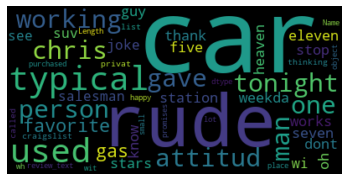

In [0]:
cloud_auto_review = WordCloud().generate(str(df_auto_clean.review_text))

plt.imshow(cloud_auto_review, interpolation='bilinear')

plt.axis('off')

plt.show()

In [0]:
#define the stop words list
my_stopwords = set(STOPWORDS)

#update the set using the words in wordcloud  which doesn't make any sense.
my_stopwords.update(['car', 'rude', 'chris', 'typical'])

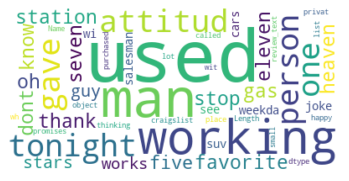

In [0]:
#generate and show the wordcloud again.
cloud_auto_review  = WordCloud(background_color='white', stopwords=my_stopwords).generate(str(df_auto_clean.review_text))

plt.imshow(cloud_auto_review, interpolation='bilinear')

plt.axis('off')

plt.show()

In [0]:
my_stopwords = ENGLISH_STOP_WORDS.union(['place'])

In [0]:
#vectorise_reviews()

df_auto_clean_en = df_auto_clean[df_auto_clean['language'] == 'en']

#Logistic Regression
print("Logistic Regression \n")
fit_and_predict_evaluate_lg(df_auto_clean_en)
print("=============================================================================================================================")
#Naive Bayes
print("\n\nNaive Bayes \n")
fit_and_predict_evaluate_nb(df_auto_clean_en)
print("=============================================================================================================================")
#Random Forest
print("\n\nRandom Forest \n")
fit_and_predict_evaluate_rf(df_auto_clean_en)

Logistic Regression 

Accuracy of training data:  0.9618511569731082
Accuracy on Testing data 0.9075
Accuracy score on predicted data 0.9075

Classification report : 
               precision    recall  f1-score   support

    Negative       0.91      0.85      0.88       157
    Positive       0.91      0.95      0.93       243

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400


Confusion Matrix : 
 [[133  24]
 [ 13 230]]

Confusion Matrix : By percentage
 [[0.3325 0.06  ]
 [0.0325 0.575 ]]


Naive Bayes 

Accuracy score on predicted data MultinomialNB 0.8225
Accuracy score on predicted data BernoulliNB 0.79
Accuracy score on predicted data GaussianNB 0.7425
Accuracy of training data:  0.9287054409005628
Accuracy on Testing data 0.8225

Classification report MultinomialNB: 
               precision    recall  f1-score   support

    Negative       0.98      0.58      0.73  

By following the above techniques, the performance of the ML Classifers could be increased to a certain extent in all the categories.